quick check of relationship between daily air quality and daily deaths due to overdose

just looked at PM 2.5 because it's the most obviously linked to systemic inflammation


tl;dr this was quick n dirty, but I'm not seeing anything I'm super excited about following up on

unsurprising daily air quality and daily OD deaths aren't related, since OD deaths are very complicated


after discussion with a MSW, decided to pivot to looking at relationship between air quality and EMS calls generally

side benefit is that we should definitely see a signal there, since well understood increase in e.g. pulmonary trouble
so start with a signal and dig down into anything behavioral

In [1]:
import os

import pandas as pd

data_dir = os.path.join(os.path.dirname(os.getcwd()), "data")

air_file_name = os.path.join(data_dir, "daily_air_quality.csv")
od_file_name = os.path.join(data_dir, "accidental_overdose.csv")

## air quality

In [2]:
air_df = pd.read_csv(air_file_name)
# clean up
air_df.date = pd.to_datetime(air_df.date)
air_df

,_id,date,site,parameter,index_value,description,health_advisory,health_effects
0,1,2016-01-01,Lawrenceville,PM25B,25,Good,NaN,NaN
1,2,2016-01-01,Flag Plaza,CO,0,Good,NaN,NaN
2,3,2016-01-01,Harrison Township,OZONE,31,Good,NaN,NaN
3,4,2016-01-01,Avalon,SO2,10,Good,NaN,NaN
4,5,2016-01-01,Lincoln,PM25,35,Good,NaN,NaN
...,...,...,...,...,...,...,...,...
71636,83737,2024-11-23,Lawrenceville 2,SO2,0,Good,NaN,NaN
71637,83738,2024-11-23,Pittsburgh,PM25_640,9,Good,NaN,NaN
71638,83739,2024-11-23,Clairton,PM25_640,8,Good,NaN,NaN
71639,83740,2024-11-23,North Braddock,PM25_640,9,Good,NaN,NaN


In [3]:
pd.crosstab(air_df.parameter, air_df.health_advisory)

health_advisory,"Active children and adults, and people with respiratory disease, such as asthma, should reduce prolonged or heavy outdoor exertion.",People with asthma should consider limiting outdoor exertion.,"People with heart or lung disease, older adults, and children should avoid all physical activity outdoors. Everyone else should avoid prolonged or heavy exertion.","People with heart or lung disease, older adults, and children should avoid prolonged or heavy exertion; everyone else should reduce prolonged or heavy exertion.","People with heart or lung disease, older adults, and children should reduce prolonged or heavy exertion.",Unusually sensitive people should consider reducing prolonged or heavy exertion.,Unusually sensitive people should consider reducing prolonged or heavy outdoor exertion.
parameter,,,,,,,
OZONE,30,0,0,0,0,0,567
PM10,0,0,0,0,0,112,0
PM10B,0,0,0,0,0,60,0
PM10_640,0,0,0,0,4,10,0
PM25,0,0,0,1,23,737,0
PM25(2),0,0,0,0,7,221,0
PM25B,0,0,0,0,0,498,0
PM25T,0,0,0,9,47,2027,0
PM25_640,0,0,2,8,14,1313,0


In [4]:
pd.crosstab(air_df.site, air_df.parameter)

parameter,CO,NO2,NO2_200,NO2_500,OZONE,PM10,PM10B,PM10_640,PM25,PM25(2),PM25B,PM25T,PM25_640,SO2
site,,,,,,,,,,,,,,
Avalon,0,0,0,0,0,0,0,0,0,0,0,2141,884,1766
Clairton,0,0,0,0,0,0,0,0,0,0,0,0,964,329
Flag Plaza,1763,0,0,0,0,2239,0,0,0,0,0,0,0,0
Glassport High Street,0,0,0,0,0,3225,0,0,0,0,0,0,0,0
Harrison Township,0,3018,93,91,3106,0,0,0,0,0,0,0,0,0
Lawrenceville,0,0,0,0,3210,0,0,0,0,0,1539,18,0,0
Lawrenceville 2,3235,0,0,0,0,0,0,0,0,0,0,0,0,3217
Liberty,0,0,0,0,0,0,0,0,0,0,0,0,0,3247
Liberty 2,0,0,0,0,0,2756,0,453,0,655,0,2051,448,0


array([[<Axes: title={'center': 'PM25'}>,
        <Axes: title={'center': 'PM25(2)'}>],
       [<Axes: title={'center': 'PM25B'}>,
        <Axes: title={'center': 'PM25T'}>],
       [<Axes: title={'center': 'PM25_640'}>, <Axes: >]], dtype=object)

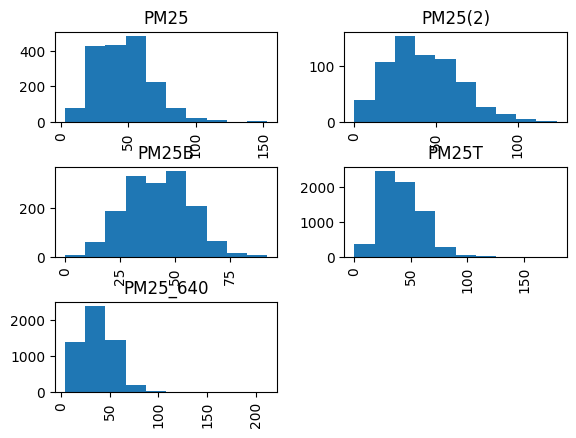

In [5]:
pm25 = air_df.loc[air_df.parameter.isin(['PM25', 'PM25(2)', 'PM25B', 'PM25T', 'PM25_640'])]
pm25.hist('index_value', by='parameter')

In [8]:
pm25_daily_avg = pm25.groupby('date').agg({'index_value': 'mean'}).reset_index().rename(columns={'index_value': 'pm25'})
# TODO better approach to combining PM 2.5 readings -or- use one from closest zip
# TODO bool health advisory + cat/int health advisory
pm25_daily_avg

,date,pm25
0,2016-01-01,29.500000
1,2016-01-02,43.250000
2,2016-01-03,36.000000
3,2016-01-04,18.750000
4,2016-01-05,48.250000
...,...,...
3244,2024-11-19,59.000000
3245,2024-11-20,39.833333
3246,2024-11-21,19.333333
3247,2024-11-22,26.333333


## accidental overdose

In [13]:
od_df = pd.read_csv(od_file_name)
# clean up
od_df.rename(columns={'death_date_and_time': 'date'}, inplace=True)
od_df.date = pd.to_datetime(pd.to_datetime(od_df.date).dt.date)
od_df

,_id,date,manner_of_death,age,sex,race,case_dispo,combined_od1,combined_od2,combined_od3,combined_od4,combined_od5,combined_od6,combined_od7,combined_od8,combined_od9,combined_od10,incident_zip,decedent_zip,case_year
0,9461596,2007-03-28,Accident,53,M,B,MO,Cocaine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15211,NaN,2007
1,9461597,2007-05-07,Accident,38,M,W,MO,Heroin,Methadone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15202,NaN,2007
2,9461598,2007-04-29,Accident,29,M,W,MO,Cocaine,Fentanyl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15104,NaN,2007
3,9461599,2007-05-03,Accident,42,M,W,MO,Alprazolam,Heroin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15107,NaN,2007
4,9461600,2007-05-01,Accident,52,M,W,MO,Alprazolam,Methadone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15236,NaN,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7191,9468787,2021-12-16,Accident,32,F,W,MO,Cocaine,Fentanyl,Hydrocodone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16503,NaN,2021
7192,9468788,2021-09-25,Accident,34,M,W,MO,Fentanyl,Cocaine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15212,NaN,2021
7193,9468789,2020-05-16,Accident,32,M,W,MO,Fentanyl,Alcohol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15239,NaN,2020
7194,9468790,2021-05-04,Accident,56,F,W,MO,Fentanyl,Para-Fluorofentanyl,Heroin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15205,NaN,2021


In [18]:
od_daily = od_df.groupby('date').agg({'manner_of_death': 'count'}).reset_index().rename(columns={'manner_of_death': 'n_od'})
od_daily

,date,n_od
0,2007-01-05,1
1,2007-01-13,1
2,2007-01-14,1
3,2007-01-15,1
4,2007-01-19,1
...,...,...
4065,2024-09-04,3
4066,2024-09-14,2
4067,2024-09-15,1
4068,2024-09-30,1


<Axes: xlabel='date'>

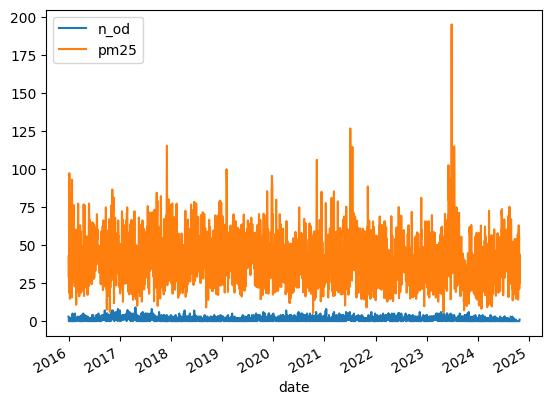

In [27]:
df = od_daily.merge(pm25_daily_avg, on='date', how='outer', validate='m:1')
df = df.loc[df.pm25.notna()]
df = df.loc[df.date <= od_daily.date.max()] # TODO when to cutoff od data, since some cases might be in process?
df.n_od = df.n_od.fillna(0)

df.plot(x='date', y=['n_od', 'pm25'])

<Axes: xlabel='pm25'>

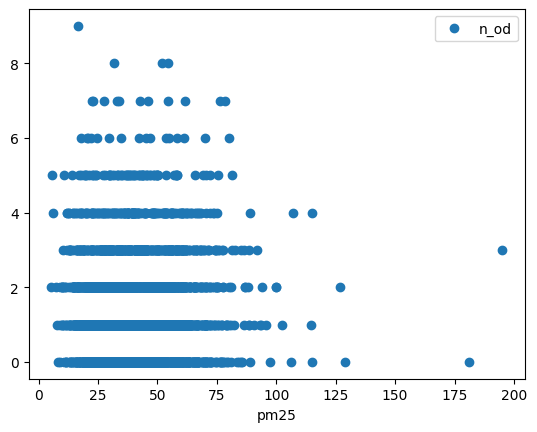

In [30]:
df.plot(x='pm25', y='n_od', style='o')

In [31]:
df.corr()

,date,n_od,pm25
date,1.000000,-0.136176,-0.116216
n_od,-0.136176,1.000000,0.011894
pm25,-0.116216,0.011894,1.000000
